In [141]:
!pip install shapely
!pip install matplotlib
!pip install opencv-python
!pip install scikit-image


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Загрузка данных

In [1]:
from pathlib import Path
from course_intro_ocr_t1.data import MidvPackage
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [2]:
DATASET_PATH = Path().absolute() / 'midv500' / 'midv500_compressed'
assert DATASET_PATH.exists(), DATASET_PATH.absolute()

In [3]:
data_packs = MidvPackage.read_midv500_dataset(DATASET_PATH)

C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\05_aze_passport\ground_truth\05_aze_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\06_bra_passport\ground_truth\06_bra_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\08_chn_homereturn\ground_truth\08_chn_homereturn.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\U

Посмотрим на один из объектов датасета:

In [4]:
dp = data_packs[2]

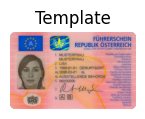

In [5]:
plt.figure(figsize=(2, 1))
plt.axis('off')
plt.title("Template")
plt.imshow(dp.template_item.image)

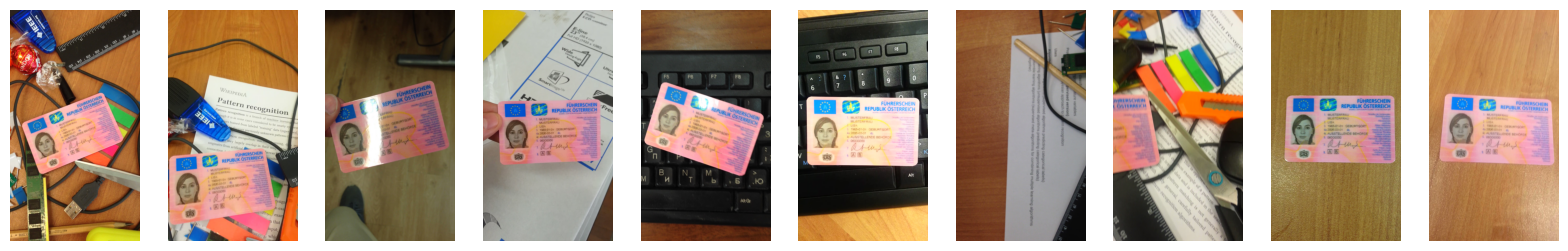

In [6]:
k = 10
fig, ax = plt.subplots(1, k, figsize=(20, 3))
for i in range(k):
    img = dp[i * 30 + 1].image
    ax[i].imshow(img)
    ax[i].axis('off')

Таким образом, мы сталкиваемся с разного рода искажениями: бликами, неоднородным задним фоном, а где-то документ и вовсе отсутствует.

Посмотрим, на bounding box документов выше:

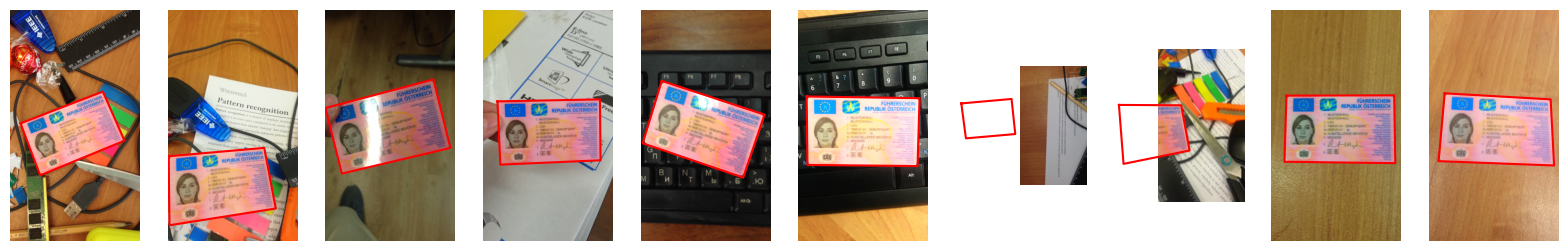

In [7]:
fig, ax = plt.subplots(1, k, figsize=(20, 3))
for i in range(k):
    item = dp[i * 30 + 1]
    img = item.image
    ax[i].imshow(img)
    coords = item.gt_data['quad']
    coords.append(coords[0])
    xs, ys = zip(*coords)
    ax[i].plot(xs, ys, color='red')
    ax[i].axis('off')

In [8]:
for i in range(k):
    item = dp[i * 30 + 1]
    print(item.is_quad_inside(), end=' ')

True True True True True True False False True True 

# Обучение модели

Рассмотрим модель HU-PageScan для сегментации документов на изображении.

Статья, посвящённая данной модели: [link](https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/iet-ipr.2020.0532).

Для обучения модели воспользуемся исходным кодом из [репозитория](https://github.com/ricardobnjunior/HU-PageScan/tree/master).

In [1]:
%run -i "HU-PageScan/train.py" --train-samples -1 --valid-samples -1 --bs 16 --lr 0.00002 --no-aug --epochs 10

{'--bs': '16',
 '--epochs': '10',
 '--gpu': '0.6',
 '--lr': '0.00002',
 '--model': 'model',
 '--no-aug': True,
 '--train-folder': '',
 '--train-samples': '-1',
 '--train-steps': '20',
 '--valid-samples': '-1',
 '--valid-steps': '20',
 '--validation-folder': ''}



C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\05_aze_passport\ground_truth\05_aze_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\06_bra_passport\ground_truth\06_bra_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\08_chn_homereturn\ground_truth\08_chn_homereturn.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\U

Train items: 10750, valid items: 4250


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 512, 512, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 512, 512, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 512, 512, 32)      │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 256, 256, 32)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 256, 256, 64)      │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 256, 256, 64)      │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 128, 128, 64)      │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 128, 128, 128)     │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 64, 64, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 64, 64, 256)       │         590,080 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 32, 32, 256)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 64, 64, 512)       │       1,049,08

 Total params: 26,621,669 (101.55 MB)

 Trainable params: 8,873,889 (33.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,747,780 (67.70 MB)

None
Batching 671 batches of size 16 each for 10736 total files
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9089 - loss: -0.9089 Batching 265 batches of size 16 each for 4240 total files

Epoch 1: saving model to ./checkpoint/model_01.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 284s 14s/step - dice_coef: 0.9092 - loss: -0.9092 - val_dice_coef: 0.8931 - val_loss: -0.8931
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.8982 - loss: -0.8982 
Epoch 2: saving model to ./checkpoint/model_02.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 290s 15s/step - dice_coef: 0.8981 - loss: -0.8981 - val_dice_coef: 0.8915 - val_loss: -0.8915
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9163 - loss: -0.9163 
Epoch 3: saving model to ./checkpoint/model_03.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 293s 15s/step - dice_coef: 0.9164 - loss: -0.9164 - val_dice_coef: 0.9023 - val_loss: -0.9023
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - dice_coef: 0.9117 - loss: -0.9117 
Epoch 4:

In [1]:
%run -i "HU-PageScan/train.py" --train-samples -1 --valid-samples -1 --bs 16 --lr 0.000005 --no-aug --epochs 10

{'--bs': '16',
 '--epochs': '10',
 '--gpu': '0.6',
 '--lr': '0.000005',
 '--model': 'model',
 '--no-aug': True,
 '--train-folder': '',
 '--train-samples': '-1',
 '--train-steps': '20',
 '--valid-samples': '-1',
 '--valid-steps': '20',
 '--validation-folder': ''}



C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\05_aze_passport\ground_truth\05_aze_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\06_bra_passport\ground_truth\06_bra_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\08_chn_homereturn\ground_truth\08_chn_homereturn.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\U

Train items: 10750, valid items: 4250


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 512, 512, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 512, 512, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 512, 512, 32)      │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 256, 256, 32)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 256, 256, 64)      │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 256, 256, 64)      │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 128, 128, 64)      │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 128, 128, 128)     │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 64, 64, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 64, 64, 256)       │         590,080 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 32, 32, 256)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 64, 64, 512)       │       1,049,08

 Total params: 26,621,669 (101.55 MB)

 Trainable params: 8,873,889 (33.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,747,780 (67.70 MB)

None
Batching 671 batches of size 16 each for 10736 total files
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9444 - loss: -0.9444 Batching 265 batches of size 16 each for 4240 total files

Epoch 1: saving model to ./checkpoint/model_01.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 296s 15s/step - dice_coef: 0.9444 - loss: -0.9444 - val_dice_coef: 0.9225 - val_loss: -0.9225
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9376 - loss: -0.9376 
Epoch 2: saving model to ./checkpoint/model_02.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 282s 14s/step - dice_coef: 0.9375 - loss: -0.9375 - val_dice_coef: 0.9208 - val_loss: -0.9208
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9435 - loss: -0.9435 
Epoch 3: saving model to ./checkpoint/model_03.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 278s 14s/step - dice_coef: 0.9437 - loss: -0.9437 - val_dice_coef: 0.9273 - val_loss: -0.9273
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - dice_coef: 0.9362 - loss: -0.9362 
Epoch 4:

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/functional_1_1/conv2d_11_1/convolution/Conv2DBackpropFilter defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_grad_filter_ops.cc:685
	 [[{{node StatefulPartitionedCall/gradient_tape/functional_1_1/conv2d_11_1/convolution/Conv2DBackpropFilter}}]] [Op:__inference_one_step_on_iterator_6374]

In [1]:
%run -i "HU-PageScan/train.py" --train-samples -1 --valid-samples -1 --bs 16 --lr 0.0000002 --no-aug --epochs 5

{'--bs': '16',
 '--epochs': '5',
 '--gpu': '0.6',
 '--lr': '0.0000002',
 '--model': 'model',
 '--no-aug': True,
 '--train-folder': '',
 '--train-samples': '-1',
 '--train-steps': '20',
 '--valid-samples': '-1',
 '--valid-steps': '20',
 '--validation-folder': ''}



C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\05_aze_passport\ground_truth\05_aze_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\06_bra_passport\ground_truth\06_bra_passport.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\Users\Vlad\A4-OCR-Intro\task1\midv500\midv500_compressed\08_chn_homereturn\ground_truth\08_chn_homereturn.json, non unicode text
  warnings.warn(f"Can't read {self.gt_path}, non unicode text", UnicodeWarning)
C:\Users\Vlad\A4-OCR-Intro\task1\course_intro_ocr_t1\data.py:42: UnicodeWarning: Can't read C:\U

Train items: 10750, valid items: 4250


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 512, 512, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 512, 512, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 512, 512, 32)      │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 256, 256, 32)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 256, 256, 64)      │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 256, 256, 64)      │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 128, 128, 64)      │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 128, 128, 128)     │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 64, 64, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 64, 64, 256)       │         590,080 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 32, 32, 256)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 64, 64, 512)       │       1,049,08

 Total params: 26,621,669 (101.55 MB)

 Trainable params: 8,873,889 (33.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,747,780 (67.70 MB)

None
Batching 671 batches of size 16 each for 10736 total files
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - dice_coef: 0.9682 - loss: -0.9682 Batching 265 batches of size 16 each for 4240 total files

Epoch 1: saving model to ./checkpoint/model_01.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 277s 14s/step - dice_coef: 0.9681 - loss: -0.9681 - val_dice_coef: 0.9403 - val_loss: -0.9403
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9640 - loss: -0.9640 
Epoch 2: saving model to ./checkpoint/model_02.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 278s 14s/step - dice_coef: 0.9639 - loss: -0.9639 - val_dice_coef: 0.9453 - val_loss: -0.9453
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - dice_coef: 0.9697 - loss: -0.9697 
Epoch 3: saving model to ./checkpoint/model_03.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 275s 14s/step - dice_coef: 0.9698 - loss: -0.9698 - val_dice_coef: 0.9390 - val_loss: -0.9390
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - dice_coef: 0.9620 - loss: -0.9620 
Epoch 4: sav

In [2]:
%run -i "HU-PageScan/train.py" --train-samples -1 --valid-samples -1 --bs 16 --lr 0.0000002 --no-aug --epochs 5

{'--bs': '16',
 '--epochs': '5',
 '--gpu': '0.6',
 '--lr': '0.0000002',
 '--model': 'model',
 '--no-aug': True,
 '--train-folder': '',
 '--train-samples': '-1',
 '--train-steps': '20',
 '--valid-samples': '-1',
 '--valid-steps': '20',
 '--validation-folder': ''}
Train items: 10750, valid items: 4250


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 512, 512, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 512, 512, 32)      │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 512, 512, 32)      │           9,248 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 256, 256, 32)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 256, 256, 64)      │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 256, 256, 64)      │          36,928 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 128, 128, 64)      │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 128, 128, 128)     │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 128, 128, 128)     │         147,584 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 64, 64, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 64, 64, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 64, 64, 256)       │         590,080 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 32, 32, 256)       │               0 │ conv2d_7[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 32, 32, 512)       │       1,180,160 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_9 (Conv2D)             │ (None, 32, 32, 512)       │       2,359,808 │ conv2d_8[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_transpose              │ (None, 64, 64, 512)       │       1,049,08

 Total params: 26,621,669 (101.55 MB)

 Trainable params: 8,873,889 (33.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,747,780 (67.70 MB)

None
Batching 671 batches of size 16 each for 10736 total files
Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - dice_coef: 0.9749 - loss: -0.9749 Batching 265 batches of size 16 each for 4240 total files

Epoch 1: saving model to ./checkpoint/model_01.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 278s 14s/step - dice_coef: 0.9748 - loss: -0.9748 - val_dice_coef: 0.9430 - val_loss: -0.9430
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9723 - loss: -0.9723 
Epoch 2: saving model to ./checkpoint/model_02.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 279s 14s/step - dice_coef: 0.9722 - loss: -0.9722 - val_dice_coef: 0.9486 - val_loss: -0.9486
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - dice_coef: 0.9785 - loss: -0.9785 
Epoch 3: saving model to ./checkpoint/model_03.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 274s 14s/step - dice_coef: 0.9785 - loss: -0.9785 - val_dice_coef: 0.9473 - val_loss: -0.9473
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - dice_coef: 0.9707 - loss: -0.9707 
Epoch 4: sav